# Лабораторная работа 9

Обход бинарного дерева поиска. Поиск
максимального и минимального значений

Левицкий Я. А., июнь 2024

## Задание 9.1. Центрированный обход бинарного дерева поиска

1. $\color{red}{Доопределите~или~переопределите}$ классы BinaryTree , BinaryNode , EmptyNode из Лабораторной работы 8 за счет определения нового метода lcr(self) , реализующего центрированный обход бинарного дерева поиска.

Результатом вызова метода lcr для экземпляра класса BinaryTree должен быть
список значений вершин дерева, отсортированных по возрастанию.

In [75]:
class BinaryTree:   
    def __init__(self):
        self.root = EmptyNode()
    def __repr__(self):
        return repr(self.root)
    def insert(self, value):
        self.root = self.root.insert(value)   
    def __contains__(self, value):
        return value in self.root
    def __len__(self):
        return len(self.root)
    def lcr(self):
        return self.root.lcr()

In [76]:
class BinaryNode:
    def __len__(self):
        return 1 + len(self.left) + len(self.right) 
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right
    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'
    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        elif value >= self.value:
            self.right = self.right.insert(value)
        return self
    def __contains__(self, value):
        if self.value == value: return True
        elif value < self.value: return value in self.left
        else: return value in self.right
    def lcr(self):
        ans = []
        ans += self.left.lcr()
        ans += [self.value]
        ans += self.right.lcr()
        return ans

In [77]:
class EmptyNode:
    def __repr__(self):
        return '*'
    def __len__(self):
        return 0
    def insert(self, value):
        return BinaryNode(self, value, self)
    def __contains__(self, value):
        return False
    def lcr(self):
        return []

1. $\color{red}{Создайте}$ список source_data из 10^3 случайных чисел, равномерно распределенных на отрезке [0, 100]. $\color{red}{Постройте}$ бинарное дерево поиска по списку случайных чисел и $\color{red}{выполните}$ центрированный обход дерева с помощью метода lcr.

1. $\color{red}{Изобразите}$ график по точкам, ординаты которых заданы списком
source_data . В этой же графической области $\color{red}{изобразите}$ график
по точкам, одинаты которых заданы списком, результатом центрированного
обхода бинарного дерева поиска.

In [78]:
import matplotlib.pyplot as plt

In [2]:
import random as rnd

Cоздадим список из 10^3 случайных чисел, равномерно распределенных на отрезке [0, 100], с помощью функции uniform из модуля random

In [3]:
source_data = [rnd.uniform(0,100) for i in range(10**3)]

Построим бинарное дерево поиска на основе списка source_data

In [4]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

NameError: name 'BinaryTree' is not defined

Выполним центрированный обход созданного бинарного дерева tree

In [82]:
sorted_data = tree.lcr()

Для проверки корректности обхода изобразим в одной графической области значения
исходного списка и результирующего списка после обхода дерева

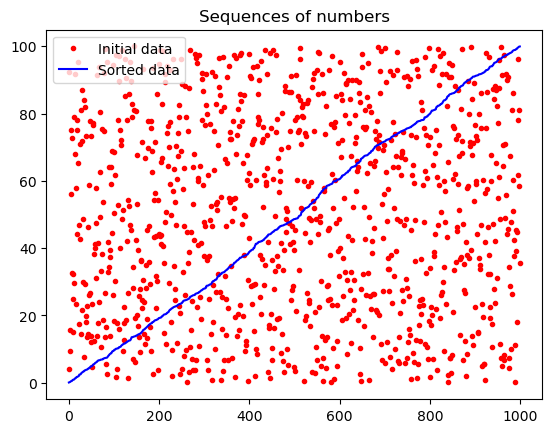

In [83]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='blue',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 9.2. Нахождение минимального и максимального значения

$\color{red}{Доопределите~или~переопределите}$ классы BinaryTree , BinaryNode ,
EmptyNode за счет определения методов min(self) и max(self) для нахождения
минимального и максимального значений в дереве, соответственно.

$\color{red}{Протестируйте}$ корректность выполнения методов min и max для дерева tree ,
созданного в Задании 9.1.

In [16]:
class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()
    def __repr__(self):
        return repr(self.root)
    def insert(self, value):
        self.root = self.root.insert(value)     
    def __contains__(self, value):
        return value in self.root   
    def __len__(self):
        return len(self.root)
    def lcr(self):
        return self.root.lcr()
    def min(self):
        if isinstance(self.root, EmptyNode):
            return None
        else:
            return self.root.min()
    def max(self):
        if isinstance(self.root, EmptyNode):
            return None
        else:
            return self.root.max()

In [21]:
class BinaryNode:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right
    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'
    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self  
    def __contains__(self, value):
        return (value in self.left) or value == self.value or (value in self.right)  
    def __len__(self):
        return len(self.left) + len(self.right) + 1
    def lcr(self):
        ans = []
        ans += self.left.lcr()
        ans += [self.value]
        ans += self.right.lcr()
        return ans
    def min(self):
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.left.min()
    def max(self):
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.right.max()

In [22]:
class EmptyNode:
    def __repr__(self):
        return '*'
    def insert(self, value):
        return BinaryNode(self, value, self)
    def __contains__(self, value):
        return False   
    def __len__(self):
        return 0
    def lcr(self):
        return []
    def min(self):
        return None
    def max(self):
        return None

In [23]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [24]:
tree.min(), tree.max()

whaadaaaaaaaaaaaat


(0.0031433850945172814, 99.79167920143124)

In [10]:
tree

((((((((*, 0.0031433850945172814, *), 0.16411865903500633, ((*, 0.32629672971515866, *), 0.36960859515767774, *)), 0.36979948478974567, (*, 0.3724150103299073, ((*, 0.3792211516295829, *), 0.4074950477154671, (((*, 0.5377530907296646, *), 0.5425374381090364, ((*, 0.8236198797857308, *), 0.8613283471628486, *)), 0.9381018229281834, (*, 0.9403052111457644, *))))), 1.0268096905565183, (((((((*, 1.1640877498286128, *), 1.1867200313742776, *), 1.3065066278469706, (((*, 1.3234463209199854, *), 1.3263145184306824, (*, 1.3542588078101714, *)), 1.4467093741823311, *)), 1.5007448068875995, ((((*, 1.5562211426820793, *), 1.5821818503923613, *), 1.9260346200840939, (*, 2.3495878926338754, *)), 2.3797221430084448, (((*, 2.438187131423697, *), 2.9205029639834734, *), 3.281116608390111, (*, 3.357852144036255, *)))), 3.445860209560525, ((*, 3.4695231374413438, *), 3.5074476034775315, *)), 3.582959365008942, *), 3.5844917184088887, ((((((*, 3.6096131663200914, *), 3.6419764081654593, *), 3.651140830536